# Performance Metrics

---

## 1. **Internal Metrics** (without ground truth)

These measure the **quality of clusters** based on compactness and separation.

### (a) **Inertia (Within-Cluster Sum of Squares, WCSS)**

* **Definition**: The sum of squared distances between each point and its assigned cluster centroid.
* **Formula**:

  $$
  WCSS = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
  $$

  where $C_k$ is cluster $k$, and $\mu_k$ its centroid.
* **Goal**: Minimize inertia (lower is better).
* **Limitation**: Always decreases as $K$ increases (can overfit).

---

### (b) **Silhouette Score**

* **Definition**: Measures how similar a point is to its own cluster vs. other clusters.
* **Formula**:
  For a point $i$:

  $$
  s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
  $$

  where:

  * $a(i)$: average distance from $i$ to points in the same cluster.
  * $b(i)$: average distance from $i$ to points in the nearest other cluster.
* **Range**: -1 to 1

  * $\approx 1$: well-clustered
  * $\approx 0$: overlapping clusters
  * $< 0$: misclassified
* **Goal**: Higher silhouette score is better.

---

### (c) **Davies–Bouldin Index (DBI)**

* **Definition**: Measures the average similarity between clusters (compactness + separation).
* **Formula**:

  $$
  DBI = \frac{1}{K} \sum_{i=1}^{K} \max_{j \ne i} \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)}
  $$

  where:

  * $\sigma_i$: average distance of points in cluster $i$ to centroid $\mu_i$.
  * $d(\mu_i, \mu_j)$: distance between centroids of clusters $i$ and $j$.
* **Goal**: Minimize DBI (lower is better).

---

### (d) **Calinski–Harabasz Index (Variance Ratio Criterion)**

* **Definition**: Ratio of between-cluster dispersion to within-cluster dispersion.
* **Formula**:

  $$
  CH = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{N-K}{K-1}
  $$

  where:

  * $B_k$: between-cluster dispersion matrix.
  * $W_k$: within-cluster dispersion matrix.
  * $N$: number of samples.
  * $K$: number of clusters.
* **Goal**: Higher is better (more separated and compact clusters).

---

## 2. **External Metrics** (when ground truth labels exist)

These compare clustering results with true labels.

### (a) **Adjusted Rand Index (ARI)**

* Measures similarity between predicted clusters and true labels, corrected for chance.
* Range: -1 to 1 (1 = perfect match, 0 = random, -1 = bad clustering).

### (b) **Normalized Mutual Information (NMI)**

* Measures shared information between clusters and true labels.
* Range: 0 to 1 (1 = perfect match).

### (c) **Homogeneity, Completeness, V-measure**

* **Homogeneity**: Each cluster contains only members of one class.
* **Completeness**: All members of a class are in the same cluster.
* **V-measure**: Harmonic mean of homogeneity & completeness.

---

**Summary Table**

| Metric                        | Type     | Range   | Goal   |
| ----------------------------- | -------- | ------- | ------ |
| Inertia (WCSS)                | Internal | ≥ 0     | Lower  |
| Silhouette Score              | Internal | -1 to 1 | Higher |
| Davies–Bouldin Index          | Internal | ≥ 0     | Lower  |
| Calinski–Harabasz             | Internal | ≥ 0     | Higher |
| Adjusted Rand Index           | External | -1 to 1 | Higher |
| Normalized Mutual Information | External | 0 to 1  | Higher |
| V-measure                     | External | 0 to 1  | Higher |

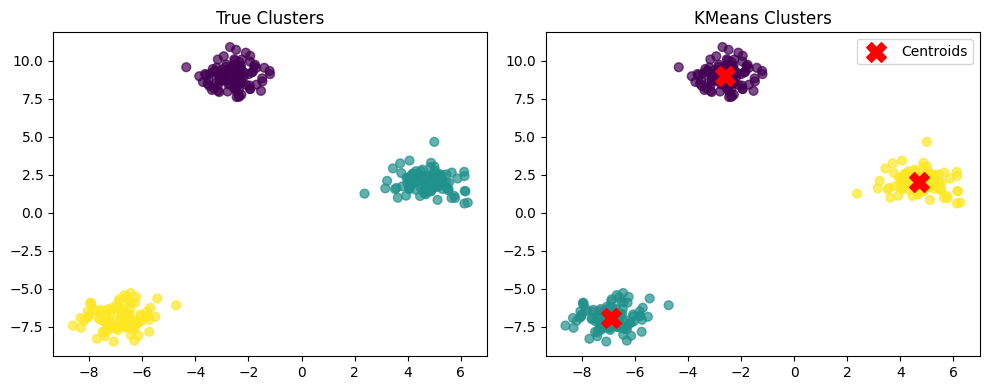

{'Inertia (WCSS)': 277.76118005096237,
 'Silhouette Score': 0.8932417420300518,
 'Davies–Bouldin Index': 0.14928348889690027,
 'Calinski–Harabasz Index': 10542.407259542682,
 'Adjusted Rand Index': 1.0,
 'Normalized Mutual Information': 1.0,
 'V-measure': 1.0}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score, v_measure_score
)

# 1. Generate synthetic dataset with ground truth labels
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Internal Metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X, y_kmeans)
dbi = davies_bouldin_score(X, y_kmeans)
ch = calinski_harabasz_score(X, y_kmeans)

# 4. External Metrics (since ground truth is known)
ari = adjusted_rand_score(y_true, y_kmeans)
nmi = normalized_mutual_info_score(y_true, y_kmeans)
v_measure = v_measure_score(y_true, y_kmeans)

# 5. Display Results
results = {
    "Inertia (WCSS)": inertia,
    "Silhouette Score": silhouette,
    "Davies–Bouldin Index": dbi,
    "Calinski–Harabasz Index": ch,
    "Adjusted Rand Index": ari,
    "Normalized Mutual Information": nmi,
    "V-measure": v_measure
}

# 6. Plot clustering result
plt.figure(figsize=(10,4))

# True clusters
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=40, alpha=0.7)
plt.title("True Clusters")

# KMeans predicted clusters
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=40, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200, label="Centroids")
plt.title("KMeans Clusters")
plt.legend()

plt.tight_layout()
plt.show()

results
